In [1]:
# Data visualization and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Topic modeling and rec system
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import pairwise_distances

In [4]:
# Load the data 
df = pd.read_pickle('../Data/Processed Data/Headphone_CleanText.pkl')

In [10]:
df.shape

(48565, 19)

In [13]:
df.head(3)

,reviewerID,asin,helpful,overall,reviewTime,category,description,title,brand,feature,rank,main_cat,price,review_summary,rating_class,year,clean_text,rating_class_num,review_length
1140,A22KW5YWAI5YDO,B000001OMI,"[0, 0]",4.0,2013-11-24,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,Good headphones. I like (very much) that the...,good,2013,good headphones like much wire one side lightw...,1,112
1141,A2FUMBORC5EMXG,B000001OMI,"[0, 0]",5.0,2014-03-10,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,My job involves wearing earphones ALL THE TIME...,good,2014,job involve wear earphones time tight ears get...,1,140
1142,A680RUE1FDO8B,B000001OMI,"[4, 5]",5.0,2008-11-27,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,Obviously these headphones are not for the aud...,good,2008,obviously headphones not audiophile person exp...,1,944


# 1. Topic Modeling 
Looking at good and bad reviews separately 

In [6]:
#df = df[df['review_length']!=0]

In [17]:
df['asin'].nunique()

1419

In [18]:
df['reviewerID'].nunique()  

36999

In [20]:
df['review_length'].describe()

count    48564.000000
mean       465.267050
std        582.063532
min          8.000000
25%        149.000000
50%        281.000000
75%        552.000000
max      14132.000000
Name: review_length, dtype: float64

In [7]:
# Exclude longer good reviews for computational purposes
df = df.drop(df[(df['review_length'] > 500) 
                                           & (df['rating_class'] == 'good')
                                          ].index)

df.shape

(36584, 19)

In [22]:
df['rating_class'].value_counts(normalize = True)

good    0.827466
bad     0.172534
Name: rating_class, dtype: float64

In [9]:
# Exclude older reviews
df= df[df['year'] > 2011]
df.to_pickle('../Data/Processed Data/Headphone_CleanText_Reduced.pkl')
df.shape

(26257, 19)

In [24]:
df['rating_class'].value_counts(normalize = True)

good    0.849754
bad     0.150246
Name: rating_class, dtype: float64

# 1.2 Good Reviews 

In [25]:
df_good = df[(df['rating_class']== 'good') & 
              (df['overall'] != 3)]
df_good.shape

(19831, 19)

**LSA - CV  (Good Reviews):**

In [26]:
vectorizer = CountVectorizer(ngram_range=(2,3), binary= True, max_df = 0.75)
doc_word = vectorizer.fit_transform(df_good['clean_text'])
doc_word.shape

(19831, 829370)

In [47]:
lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.00156461, 0.00105791, 0.00099866, 0.00088074, 0.00081532,
       0.00077749, 0.00072967, 0.00071006, 0.00060955, 0.00055546])

In [48]:
topic_review = pd.DataFrame(lsa.components_.round(3),
             index = ["topic1","topic2","topic3","topic4","topic5",
                      "topic6","topic7","topic8","topic9","topic10",
                     ],
             columns = vectorizer.get_feature_names())
topic_review

,____ buy,____ buy think,_hate_ earbuds,_hate_ earbuds however,_is_ nice,_is_ nice case,_is_ think,_is_ think work,_is_ velcrod,_is_ velcrod no,...,zxr amaze,zxr amaze sound,zxr sound,zxr sound card,zxthe stuff,zxthe stuff hear,zzziiiippp think,zzziiiippp think make,zzzzzz bose,zzzzzz bose plane
topic1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic2,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic3,-0.0,-0.0,-0.000,-0.000,-0.0,-0.0,0.001,0.001,0.001,0.001,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
topic4,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic5,-0.0,-0.0,-0.000,-0.000,-0.0,-0.0,-0.000,-0.000,-0.000,-0.000,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
topic6,-0.0,-0.0,0.000,0.000,0.0,0.0,-0.000,-0.000,-0.000,-0.000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
topic7,0.0,0.0,-0.000,-0.000,-0.0,-0.0,0.000,0.000,0.000,0.000,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
topic8,0.0,0.0,-0.000,-0.000,-0.0,-0.0,-0.000,-0.000,-0.000,-0.000,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
topic9,0.0,0.0,0.001,0.001,0.0,0.0,-0.000,-0.000,-0.000,-0.000,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic10,0.0,0.0,0.000,0.000,0.0,0.0,-0.000,-0.000,-0.000,-0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0


In [49]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [50]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
sound quality, great sound, good sound, sound great, ear bud, sound good, work great, quality good, listen music, work well

Topic  1
sound great, work great, sound good, great sound, ear bud, work well, great price, listen music, would recommend, headphones sound

Topic  2
work great, sound quality, headphones work, headphones work great, still work, work great use, still work great, great use, would recommend, work great no

Topic  3
sound good, work well, good sound, ear bud, good price, good sound quality, good quality, pretty good, good not, good sound good

Topic  4
great sound, sound good, great sound quality, headphones great, great sound good, headphones great sound, comfortable great, comfortable great sound, sound headphones, great sound comfortable

Topic  5
work well, great sound, noise cancel, listen music, highly recommend, would recommend, headphones work, great sound quality, headphones work well, seem work

Topic  6
ear bud, much better, different size, fit 

In [51]:
tfidf = TfidfVectorizer(ngram_range=(2,3), binary= True)
doc_word = tfidf.fit_transform(df_good['clean_text'])
doc_word.shape

(19831, 829370)

**LSA and TFIDF  (Good Reviews):**

In [52]:
display_topics(lsa, tfidf.get_feature_names(), 10)


Topic  0
sound quality, great sound, good sound, sound great, ear bud, sound good, work great, quality good, listen music, work well

Topic  1
sound great, work great, sound good, great sound, ear bud, work well, great price, listen music, would recommend, headphones sound

Topic  2
work great, sound quality, headphones work, headphones work great, still work, work great use, still work great, great use, would recommend, work great no

Topic  3
sound good, work well, good sound, ear bud, good price, good sound quality, good quality, pretty good, good not, good sound good

Topic  4
great sound, sound good, great sound quality, headphones great, great sound good, headphones great sound, comfortable great, comfortable great sound, sound headphones, great sound comfortable

Topic  5
work well, great sound, noise cancel, listen music, highly recommend, would recommend, headphones work, great sound quality, headphones work well, seem work

Topic  6
ear bud, much better, different size, fit 

# NMF and CV  (Good Reviews)

In [54]:
vectorizer = CountVectorizer(ngram_range=(2,3), binary=True, max_df=0.75)
doc_word = vectorizer.fit_transform(df_good['clean_text'])

In [58]:
nmf=NMF(10)
doc_topic = nmf.fit_transform(doc_word)

In [60]:
display_topics(nmf, vectorizer.get_feature_names(), 10)


Topic  0
sound quality, quality good, sound quality good, quality great, sound quality great, good sound quality, great sound quality, quality excellent, sound quality excellent, quality headphones

Topic  1
sound great, great price, headphones sound, headphones sound great, sound great price, comfortable sound, great sound great, comfortable sound great, great fit, comfortable wear

Topic  2
work great, headphones work, headphones work great, still work, great price, great use, still work great, work great use, great no, head phone

Topic  3
sound good, good price, headphones sound, good not, sound good not, sound good price, headphones sound good, quality sound, good bass, good sound good

Topic  4
great sound, great sound quality, headphones great, comfortable great, comfortable great sound, headphones great sound, sound headphones, great sound great, price great, sound comfortable

Topic  5
work well, headphones work, headphones work well, seem work, seem work well, well sound, vo

**NMF with TFIDF  (Good Reviews):**

In [61]:
tfidf = TfidfVectorizer(ngram_range=(2,3), binary=True, max_df=0.75)
doc_word = tfidf.fit_transform(df_good['clean_text'])

In [62]:
nmf=NMF(10)
doc_topic = nmf.fit_transform(doc_word)

In [63]:
display_topics(nmf, tfidf.get_feature_names(), 10)


Topic  0
sound quality, quality good, sound quality good, quality great, sound quality great, quality excellent, sound quality excellent, great sound quality, comfortable sound quality, quality price

Topic  1
sound great, great price, headphones sound, sound great price, headphones sound great, great fit, comfortable sound, comfortable wear, comfortable sound great, great sound great

Topic  2
work great, headphones work, headphones work great, work great use, great use, still work, work great no, work great price, great no, great price

Topic  3
great sound, great sound quality, headphones great, comfortable great, comfortable great sound, headphones great sound, great sound good, price great, great sound comfortable, sound comfortable

Topic  4
sound good, good price, sound good price, good quality, good not, headphones sound, great sound good, sound good not, good headphones, good sound good

Topic  5
work well, headphones work, headphones work well, seem work, seem work well, wel

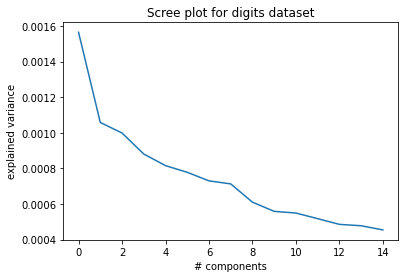

In [29]:
lsa = TruncatedSVD(15)
doc_topic = lsa.fit_transform(doc_word)

plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');

# 1.3 Bad Reviews:

In [31]:
df_bad = df[df['rating_class'] == 'bad']
df_bad.shape

(3945, 19)

**LSA with  CV  (Bad Reviews):**

In [33]:
vectorizer = CountVectorizer(ngram_range=(2,3), binary=True)
doc_word = vectorizer.fit_transform(df_bad['clean_text'])
doc_word.shape

(3945, 365792)

In [70]:
lsa=TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)

In [71]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
listen music, im not, sound good, headphones not, build quality, could not, great sound, not even, use headphones, look like

Topic  1
would not, not recommend, work well, sound quality, every time, customer service, first time, positive review, dont need, time use

Topic  2
sound quality, noise cancel, headphones not, not work, listen music, would not, sound great, much better, work well, not good

Topic  3
sound quality, pretty much, headphones would, sennheiser hd, im sure, every day, would not, low end, not case, certainly not

Topic  4
sound quality, listen music, would not, much better, not good, build quality, dont know, im not, ear bud, sound like

Topic  5
metal part, want able, constant low, constant low frequency, dog bark, low frequency noise, engine noise, frequency noise, us know, tv audio

Topic  6
noise cancellation, impress sound, dont think, dont think thats, result poor fit, result poor, not work, use im, still get, cant use

Topic  7
sound good, write revi

**LSA with TFIDF  (Bad Reviews):**

In [73]:
tfidf = TfidfVectorizer(ngram_range=(2,3), binary=True, max_df=0.75)
doc_word = tfidf.fit_transform(df_bad['clean_text'])

In [74]:
nmf=NMF(10)
doc_topic = nmf.fit_transform(doc_word)

In [75]:
display_topics(nmf, tfidf.get_feature_names(), 10)


Topic  0
sound quality, much better, poor sound, get pay, poor sound quality, ear bud, sound like, quality poor, quality not, sound quality poor

Topic  1
would not, not recommend, would not recommend, would not buy, not buy, break easily, not recommend buy, not recommend item, not recommend product, poor would not

Topic  2
not work, work not, send back, product not, volume control, control not, didnt work, would work, not work iphone, control not work

Topic  3
stop work, one side, side stop, side stop work, one side stop, last long, work no, stop work no, work great, not last

Topic  4
low volume level, not fit, headphones not fit, not fit head, even low volume, fit head, not big enough, head hurt, pad ear cup, big enough

Topic  5
not fit, not fit ears, fit ears, fit ears properly, months light use, months light, ok definitely detail, almost nonexistenti use, die quicklysound, ok definitely

Topic  6
waste money, dont waste, dont waste money, not waste, money get, waste time, bare

**NMF with CV  (Bad Reviews):**

In [83]:
vectorizer = CountVectorizer(ngram_range=(2,3), binary=True, max_df=0.75)
doc_word = vectorizer.fit_transform(df_bad['clean_text'])

In [84]:
nmf=NMF(10)
doc_topic = nmf.fit_transform(doc_word)

In [85]:
display_topics(nmf, vectorizer.get_feature_names(), 10)


Topic  0
sound good, im not, could not, not even, ear pad, ive ever, look like, headphones ive, use headphones, great sound

Topic  1
would not, not recommend, work well, customer service, every time, first time, try use, time use, long enough, even worse

Topic  2
sound quality, much better, listen music, not good, sound like, would not, ear bud, build quality, im not, noise cancel

Topic  3
low end, im sure, sennheiser hd, pretty much, headphones would, would never, let know, expect much, headphone not, mid range

Topic  4
not work, headphones not, work well, sound great, work great, not fit, noise cancel, go back, think would, get work

Topic  5
would not, noise cancel, waste money, dont know, noise cancellation, doesnt work, think would, make sure, would work, dont think

Topic  6
not work, im not, not sure, headphones not, im not sure, no matter, battery life, audio quality, not use, dont think

Topic  7
stop work, sound good, pair headphones, listen music, headphones sound, no i

**NMF with TFIDF  (Bad Reviews):**

In [87]:
tfidf = TfidfVectorizer(ngram_range=(2,3))
doc_word = tfidf.fit_transform(df_bad['clean_text'])

In [88]:
from sklearn.decomposition import NMF
nmf=NMF(10)
doc_topic = nmf.fit_transform(doc_word)

In [89]:
display_topics(nmf, tfidf.get_feature_names(), 10)


Topic  0
sound quality, poor sound, poor sound quality, sound like, quality not, get pay, much better, not good, quality poor, good sound

Topic  1
not work, work not, send back, product not, product not work, not work not, work phone, item not work, work iphone, not work iphone

Topic  2
noise cancel, cancel headphones, noise cancel headphones, cancel noise, cancel not, noise cancellation, active noise, not good, noise reduction, noise cancel not

Topic  3
would not, not recommend, would not recommend, not buy, would not buy, recommend buy, break easily, not recommend buy, not recommend item, get pay

Topic  4
stop work, side stop, one side, side stop work, one side stop, work no, last long, stop work no, work great, months one

Topic  5
ear bud, bud ear, bud not, set ear bud, ear bud ear, set ear, ear bud not, not like, bud get, bud ear bud

Topic  6
could not, not get, could not get, get work, not get work, work fine, no matter, work could not, work could, dont know

Topic  7
go ba

# 2. WordCloud - Compare two brands

In [663]:
df = pd.read_pickle('../Data/Processed Data/Headphone_CleanText.pkl')
df = df.drop_duplicates(['reviewerID','asin'])
df = df[df['review_length']!=0]

In [664]:
df = df[df['review_length'] < 300]  
df = df[df['year']> 2011]
df.shape

(19616, 19)

In [270]:
df['rating_class'].value_counts(normalize = True)

good    0.885298
bad     0.114702
Name: rating_class, dtype: float64

In [271]:
brands = df.groupby('brand', as_index= False)['reviewerID'].count().sort_values('reviewerID', ascending = False)

In [272]:
brands.head()

,brand,reviewerID
205,Panasonic,2448
258,Sony,1786
250,Sennheiser,1694
145,JVC,658
161,Koss,447


In [273]:
df_panasonic = df[df['brand'] == 'Panasonic']
df_panasonic.shape

(2448, 19)

In [274]:
df_sony = df[df['brand'] == 'Sony']
df_sony.shape

(1786, 19)

In [669]:
df_sony_panasonic = df[(df['brand'].isin(['Panasonic', 'Sony'])) &
                      ~df['price'].isna()]
df_sony_panasonic.shape

(3254, 19)

In [671]:
df_sony_panasonic['price'] = pd.to_numeric(df_sony_panasonic['price'].replace('[^0-9\.]', '', regex=True), errors='coerce').astype(float)
df_sony_panasonic.groupby('brand')['price'].mean()

brand
Panasonic    8.718246
Sony         8.740969
Name: price, dtype: float64

**Panasonic:**

In [233]:
df_panasonic = df_panasonic[['reviewerID','clean_text', 'rating_class_num']]
df_panasonic.set_index('reviewerID', inplace=True)

df_panasonic.sample(5)

,clean_text,rating_class_num
reviewerID,,
A5RX8JTDW08PT,buy headphones also buy splitter seperate volu...,1
A31XHA2KMJHFAI,impress headphones consider price relatively c...,1
A1RTXXRXQPWH9F,work well listen videos night everyone asleep ...,1
A1X8PKH9EX78ZF,everyone rat highly well pretty darn good perf...,1
AXW92YHJTONAK,new favorite headphones absolutely love fit ea...,1


In [234]:
# Initialize the countervectorizer
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer(ngram_range=(2, 3),binary=True)

transformed_matrix = countVec.fit_transform(df_panasonic['clean_text'])
names = countVec.get_feature_names()

# Creating a new datbase of users and words
df_panasonic2 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
# Adding a 'rating' column from previous dataframe's rating value 
ratings = df_panasonic['rating_class_num'].to_list()
df_panasonic2['rating'] = ratings
df_panasonic2

,abilities offer,abilities offer light,ability destroy,ability destroy even,ability far,ability far better,ability would,ability would appear,able adjust,able adjust fit,...,zilch give grandchildren,zone annoy,zone annoy dont,zune earbuds,zune earbuds come,zune sound,zune sound not,zune ver,zune ver earbuds,rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [215]:
df_panasonic2[df_panasonic2['love'] == 1]['rating'].mean()

0.9873417721518988

In [213]:
df_panasonic2[df_panasonic2['buy'] == 1]['rating'].mean()

0.9139559286463799

In [214]:
df_panasonic2[df_panasonic2['junk'] == 1]['rating'].mean()

0.6111111111111112

In [235]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df_panasonic2[df_panasonic2[name] == 1]['rating'].mean()
        rating_count = df_panasonic2[df_panasonic2[name] == 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [236]:
# Create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})
df_summary

,feature_name,avg_rating,rating_count
0,abilities offer,1.0,1
1,abilities offer light,1.0,1
2,ability destroy,1.0,1
3,ability destroy even,1.0,1
4,ability far,1.0,1
...,...,...,...
83254,zune earbuds come,1.0,1
83255,zune sound,1.0,1
83256,zune sound not,1.0,1
83257,zune ver,0.0,1


In [34]:
# Pickle this database
#df_summary.to_pickle('../Data/Processed Data/wc_panasonic.pkl')
df_summary = pd.read_pickle('../Data/Processed Data/wc_panasonic.pkl')

In [35]:
# Words that are commonly used in the reviews which have good ratings
df_wc = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_wc.head(50)

,feature_name,avg_rating,rating_count
59637,quality great,1.000000,39
26352,fit perfectly,1.000000,27
57329,price point,1.000000,23
56986,price great,1.000000,38
28159,get use,1.000000,21
56952,price good,1.000000,41
29116,good bass,1.000000,30
49533,not great,1.000000,21
61128,really like,1.000000,32
29539,good headphones,1.000000,37


In [36]:
wc_words = dict(zip(df_wc['feature_name'].tolist(), df_wc['avg_rating'].tolist()))

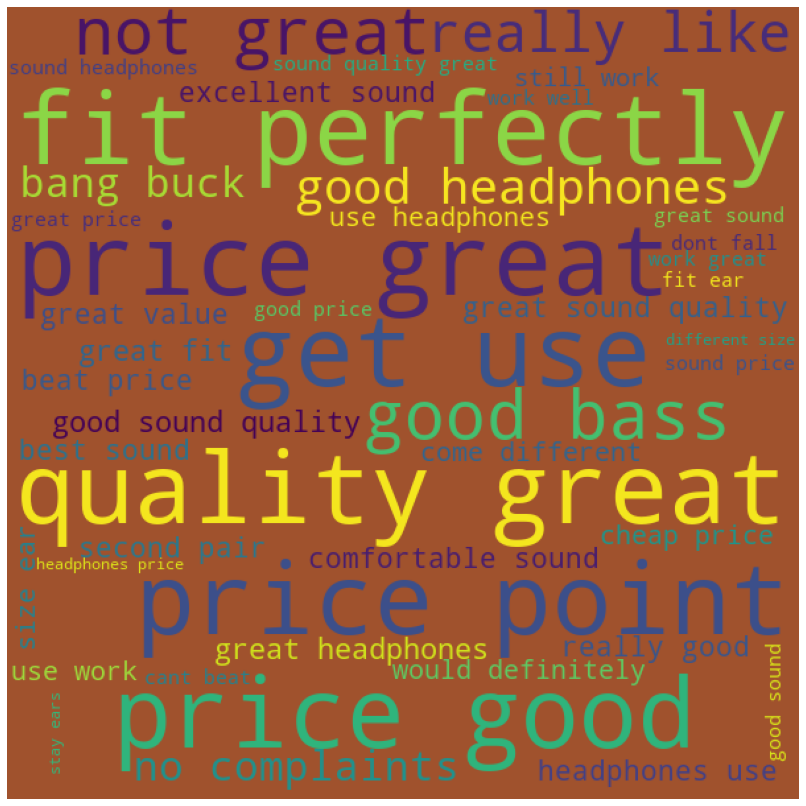

<Figure size 432x288 with 0 Axes>

In [69]:
# Generate a word cloud image
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='sienna',
                min_font_size = 10).generate_from_frequencies(wc_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (11, 11), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
plt.savefig('../Images/wc_panasonic.jpg' ) 

In [56]:
df_wc1 = df_wc[df_wc['avg_rating']==1]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

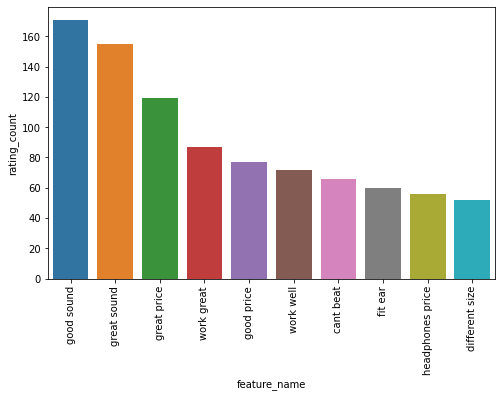

In [57]:
df_wc1 = df_wc.sort_values('rating_count', ascending=False).head(10)
plt.figure(figsize = (8,5))
sns.barplot(x= 'feature_name', y='rating_count', data = df_wc1)
plt.xticks(rotation=90)

**Sony:**

In [275]:
df_sony.shape

(1786, 19)

In [276]:
df_sony = df_sony[['reviewerID','clean_text', 'rating_class_num']]
df_sony.set_index('reviewerID', inplace=True)

df_sony.sample(5)

,clean_text,rating_class_num
reviewerID,,
A1Q2X0SL1NLMXQ,sad see become onetime sony quality work two w...,0
ALLFPK4VJC48D,great soundvery comfortable buy headphones rep...,1
AI7S94161XV07,midrange distant bass suffice general listen t...,1
A25FZUJIM05TOO,little problem digital analog converter first ...,1
A3PPG96S09WT8H,cant believe long cord longest cord ive ever s...,0


In [277]:
# Initialize the countervectorizer
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer(ngram_range=(2, 3),binary=True)

transformed_matrix = countVec.fit_transform(df_sony['clean_text'])
names = countVec.get_feature_names()

# Creating a new datbase of users and words
df_sony2 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
# Adding a 'rating' column from previous dataframe's rating value 
ratings_sony = df_sony['rating_class_num'].to_list()
df_sony2['rating'] = ratings_sony
df_sony2

,abetter beat,abetter job,abetter job comfortable,ability block,ability block noise,ability give,ability give star,ability hold,ability hold charge,ability not,...,zero recommendment wish,zerosent miss,zerosent miss part,zipclip couldnt,zipclip couldnt happier,ziplock bag,ziplock bag dont,zx negligiblewhat,zx negligiblewhat really,rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [278]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df_sony2[df_sony2[name] == 1]['rating'].mean()
        rating_count = df_sony2[df_sony2[name] == 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [279]:
##### Create a new dataframe from words, average ratings, and rating counts
df_sony_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})
df_sony_summary

,feature_name,avg_rating,rating_count
0,abetter beat,1.0,1
1,abetter job,0.0,1
2,abetter job comfortable,0.0,1
3,ability block,1.0,1
4,ability block noise,1.0,1
...,...,...,...
69370,zipclip couldnt happier,1.0,1
69371,ziplock bag,1.0,1
69372,ziplock bag dont,1.0,1
69373,zx negligiblewhat,1.0,1


In [44]:
# Pickle this database
#df_sony_summary.to_pickle('../Data/Processed Data/wc_sony.pkl')
df_sony_summary = pd.read_pickle('../Data/Processed Data/wc_sony.pkl')

In [45]:
# Words that are commonly used in the reviews which have good ratings
df_wc_sony = df_sony_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_wc_sony.head(50)

,feature_name,avg_rating,rating_count
24018,great price,1.000000,42
23789,great headphones,1.000000,24
56852,sound quality great,1.000000,23
26910,headphones use,1.000000,21
22982,good price,1.000000,26
49554,really good,1.000000,35
34745,love headphones,1.000000,36
9972,comfortable wear,1.000000,30
52462,second pair,1.000000,27
33116,listen music,0.979167,48


In [46]:
wc_words_sony = dict(zip(df_wc_sony['feature_name'].tolist(), df_wc_sony['avg_rating'].tolist()))

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='peachpuff',
                min_font_size = 10).generate_from_frequencies(wc_words_sony)
 
# plot the WordCloud image                       
plt.figure(figsize = (11, 11), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
plt.savefig('../Images/wc_sony.jpg' ) #bbox_inches='tight'

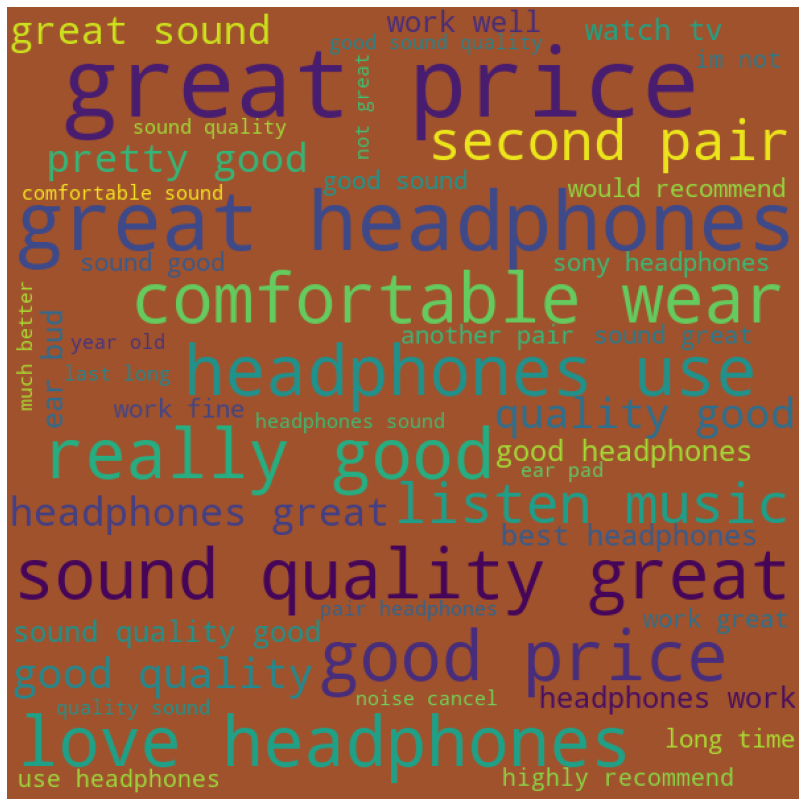

<Figure size 432x288 with 0 Axes>

In [88]:
# Generate a word cloud image
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='Sienna',
                min_font_size = 10).generate_from_frequencies(wc_words_sony)
 
# plot the WordCloud image                       
plt.figure(figsize = (11, 11), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
plt.savefig('../Images/wc_sony.jpg' ) #bbox_inches='tight'

# 3. Recommender System

In [620]:
df_rec = pd.read_pickle('../Data/Processed Data/Headphone_CleanText.pkl')
df_rec = df_rec.drop_duplicates(['reviewerID','asin'])

In [623]:
df_rec['price'] = pd.to_numeric(df_rec['price'].replace('[^0-9\.]', '', regex=True), errors='coerce').astype(float)
df_rec = df_rec[~df_rec['price'].isna()]
df_rec = df_rec[df_rec['price']> 10]

#df_rec = df_rec[df_rec['year']>2012]

df_rec.shape

(6046, 19)

In [624]:
vectorizer = CountVectorizer(ngram_range=(1,2), binary=True)
doc_word = vectorizer.fit_transform(df_rec['clean_text'])

lsa=TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)

In [637]:
user_text = ['Comfortable headphone, with great sound quality and good looking design']

interm = vectorizer.transform(user_text)
interm = lsa.transform(interm)

final = pairwise_distances(interm,doc_topic,metric='cosine').argsort() 

In [638]:
final

array([[  11, 5642, 1176, ..., 5023, 1915, 5846]])

In [639]:
top5_recs = list(final[0][0:5])
top5_recs

[11, 5642, 1176, 4651, 5979]

In [655]:
asin = df_rec.iloc[5642]['asin']
prod = df_rec[df_rec['asin'] == asin]
avg_rating = prod.groupby('asin')['overall'].mean()
avg_rating[0]

4.25

In [662]:
for i in top5_recs:
    print('Recommendation #{}\n'.format(top5_recs.index(i)+1))
    print('Title: {} \n'.format(df_rec.iloc[i]['title']))
    
    # Avg rating
    asin = df_rec.iloc[i]['asin']
    prod = df_rec[df_rec['asin'] == asin]
    avg_rating = prod.groupby('asin')['overall'].mean()
    
    print('price: ${} ---- Average rating: {:.2f} \n'.format( df_rec.iloc[i]['price'], avg_rating[0]))
    print('Sample Review: {} \n'.format( df_rec.iloc[i]['review_summary']))
    print('-----------------------------------')

Recommendation #1

Title: Sony Studio Monitor MDR-V600 Stereo Headphone (Discontinued by Manufacturer) 

price: $21.76 ---- Average rating: 4.36 

Sample Review: These ear phones are very comfortable and the sound quality is really good too.comfortable and great sound 

-----------------------------------
Recommendation #2

Title: KEF M500 Hi-Fi Headphones w/Mic &amp; Remote - Aluminum/Black 

price: $13.4 ---- Average rating: 4.25 

Sample Review: Comfort is great and the sound quality is exactly what I exactly expected from KEF.  I highly recommend these headphones.Love it! 

-----------------------------------
Recommendation #3

Title: Insignia NS-P4112 Portable CD Player with Skip Protection for CD, CD-R, CD-RW - Includes Headphones 

price: $22.0 ---- Average rating: 3.83 

Sample Review: Awesome and just right for the money. very compact and the headphones have great sound quality. I would recommend this to anyone.Awesome portable CD player 

-----------------------------------
R